In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Exercise 23.3

Below we use an iterative method to solve the nonlinear equations given by the book. 

In [2]:
def solve(B1 = 0, S1=100, I1 = 5, R1=0, P1N=0, P2N=1, P3N=0, beta=0.002, d2=0.1, d=0.2, N=4, B=1, maxiter=40000, tol=1e-12):

    S = np.zeros(N)
    S[0] = S1
    I = np.zeros(N)
    I[0] = I1
    R = np.zeros(N)
    R[0] = R1

    P1 = np.zeros(N)
    P1[-1] = P1N
    P2 = np.zeros(N)
    P2[-1] = P2N
    P3 = np.zeros(N)
    P3[-1] = P3N

    u = np.zeros(N-1)
    old_u = u.copy()
    old_S = np.zeros(N)
    old_I = np.zeros(N)
    old_R = np.zeros(N)
    converged = False


    # run through iterations
    for _ in range(maxiter):
        # update S, I, R, P1, P2, P3
        for k in range(N-1):
            # update S (forwards)
            S[k + 1] = S[k]*(1 - u[k]) - beta*S[k]*(1 - u[k])*I[k]
            # update I(forwards)
            I[k + 1] = I[k] + beta*S[k]*(1 - u[k])*I[k] - d2*I[k]
            # update R (forwards)
            R[k + 1] = R[k] + u[k] * S[k]

            j = N-k-1
            # update P1 (backwards)
            P1[j-1] = P1[j]*(1 - u[j-1] - beta*(1 - u[j-1])*I[j-1]) + beta*P2[j]*(1 - u[j-1])*I[j-1] + u[j-1]*P3[j]
            # update P2 (backwards)
            P2[j-1] = -beta*P1[j]*S[j-1]*(1 - u[j-1]) + P2[j]*(1 + beta*(1 - u[j-1]) - d2) - 1
            # update P3 (backwards):
            P3[j-1] = P3[j]

        # now we update u 
        for k in range(N-1):
            val = (-P1[k+1]*S[k] + beta*P1[k+1]*S[k]*I[k] - beta*P2[k+1]*S[k]*I[k] + P3[k+1]*S[k] - B1) / (2*B)
            u[k] = min(1-d, max(0, val))

        # check convergence
        nu = np.linalg.norm(u-old_u, ord=1) < tol 
        nS = np.linalg.norm(S-old_S, ord=1) < tol
        nI = np.linalg.norm(I-old_I, ord=1) < tol
        nR = np.linalg.norm(R-old_R, ord=1) < tol
        if (nu and nS and nI and nR):
            converged = True
            break

        old_u = u.copy()
        old_S = S.copy()
        old_I = I.copy()
        old_R = R.copy()

    return S, I, R, P1, P2, P3, u, converged 

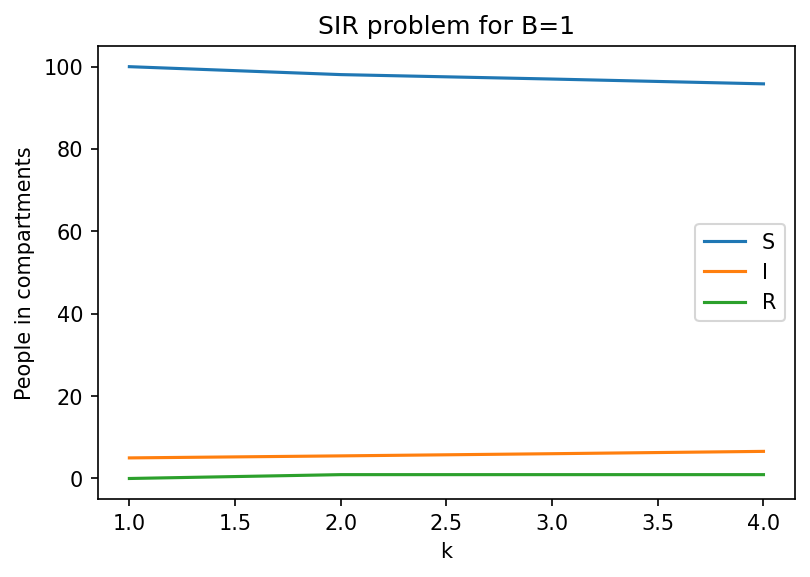

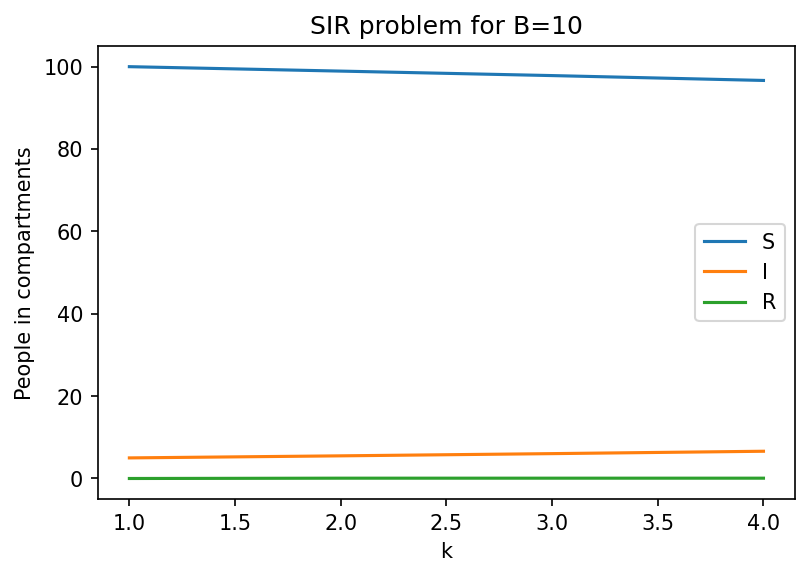

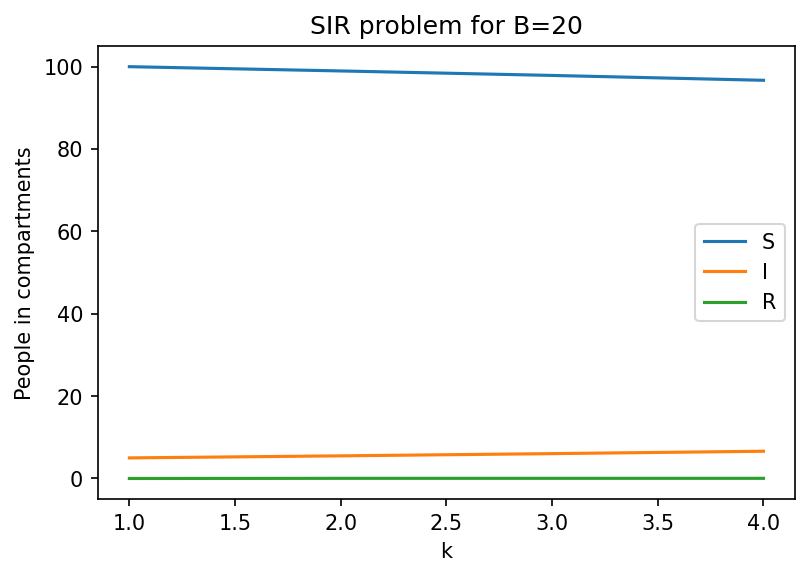

In [3]:
def problem23_3():
    """
    Function to complete exercise 23.3
    """
    B1 =  0
    S1 = 100
    I1 = 5
    R1 = 0
    P1N = 0
    P2N = 1
    P3N = 0
    beta = 0.002
    d2 = 0.1
    d = 0.2
    N = 4

    for B in [1, 10, 20]:
        S, I, R, P1, P2, P3, u, converged = solve(B1 = B1, S1=S1, I1 = I1, R1=R1, P1N=P1N, P2N=P2N, P3N=P3N, beta=beta, d2=d2, d=d, N=N, B=B)

        D = np.arange(1, N+1)
        fig = plt.figure()
        fig.set_dpi(150)
        ax = fig.add_subplot(111)
        ax.plot(D, S, label='S')
        ax.plot(D, I, label='I')
        ax.plot(D, R, label='R')
        ax.legend(loc='best')
        ax.set_xlabel('k')
        ax.set_ylabel('People in compartments')
        ax.set_title('SIR problem for B={}'.format(B))
        plt.show()

    return

problem23_3()

As we can see up above, the solutions our iterative method found remain valid for all time. That is, there are no negative values for the population in any of the models. Moreover, there is very little difference between the solutions themselves. This is likely because our value for $N$ is so small, assuming we have structural stability in the model itself and no bifurcations then it make sense why different values for $B$ give similar solutions.  